### Importing Libraries

In [149]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings(action='ignore')

### Importing the data

In [150]:
data = pd.read_csv('traineddataUpdate.csv')
data.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080


### Segregating variables: Independent and Dependent Variables

<AxesSubplot:xlabel='Price', ylabel='Count'>

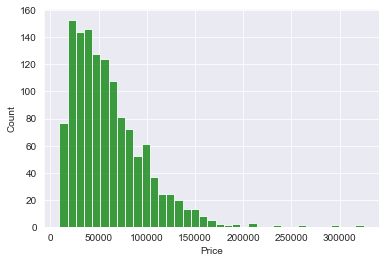

In [151]:
sn.histplot(data['Price'],color='green')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

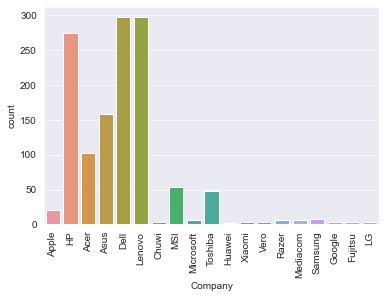

In [152]:
sn.countplot(data['Company'])
plt.xticks(rotation = 'vertical')

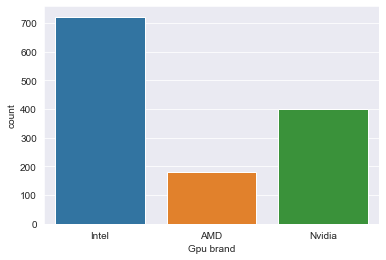

In [153]:
sn.countplot(data['Gpu brand'])
plt.show()

### Splitting the data into train set and the test set

In [154]:
x

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Type,CPU_type_name,Company_Type,GPU_type
0,8,1.37,0,1,226.983005,0,128,4,2,1,1
1,8,1.34,0,0,127.677940,0,0,4,2,1,1
2,8,1.86,0,0,141.211998,0,256,3,2,7,1
3,16,1.83,0,1,220.534624,0,512,4,3,1,0
4,8,1.37,0,1,226.983005,0,256,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1297,4,1.80,1,1,157.350512,0,128,0,3,10,1
1298,16,1.30,1,1,276.053530,0,512,0,3,10,1
1299,2,1.50,0,0,111.935204,0,0,3,4,10,1
1300,6,2.19,0,0,100.454670,1000,0,3,3,7,0


In [155]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 1)

In [156]:
train_y

452      81731.5200
916      51148.8000
1063     52746.6672
575      13266.7200
464     111355.2000
           ...     
715      45664.6896
905     111834.7200
1096     34035.2640
235      47898.7200
1061     53173.4400
Name: Price, Length: 976, dtype: float64

In [157]:
labeled_type_name = LabelEncoder()
labeled_comapny_name = LabelEncoder()
labeled_cpu_name = LabelEncoder()
labeled_gpu_type = LabelEncoder()

In [158]:
data['Type'] = labeled_type_name.fit_transform(data['TypeName'])
data['CPU_type_name'] = labeled_comapny_name.fit_transform(data['CPU_name'])
data['Company_Type'] = labeled_cpu_name.fit_transform(data['Company'])
data['GPU_type'] = labeled_gpu_type.fit_transform(data['Gpu brand'])
data

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,Type,CPU_type_name,Company_Type,GPU_type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,4,2,1,1
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,4,2,1,1
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,3,2,7,1
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,4,3,1,0
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,33992.6400,0,3,10,1
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,79866.7200,0,3,10,1
1299,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,12201.1200,3,4,10,1
1300,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,40705.9200,3,3,7,0


In [159]:
#seperating independent and dependent variables
x = data.drop(['Price','Company','TypeName','CPU_name','OpSys','Gpu brand'], axis=1)
y = data['Price']
x.shape, y.shape
x

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Type,CPU_type_name,Company_Type,GPU_type
0,8,1.37,0,1,226.983005,0,128,4,2,1,1
1,8,1.34,0,0,127.677940,0,0,4,2,1,1
2,8,1.86,0,0,141.211998,0,256,3,2,7,1
3,16,1.83,0,1,220.534624,0,512,4,3,1,0
4,8,1.37,0,1,226.983005,0,256,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1297,4,1.80,1,1,157.350512,0,128,0,3,10,1
1298,16,1.30,1,1,276.053530,0,512,0,3,10,1
1299,2,1.50,0,0,111.935204,0,0,3,4,10,1
1300,6,2.19,0,0,100.454670,1000,0,3,3,7,0


### Implementing Support Vector Classifer

In [160]:
#importing Support Vector Classifier
from sklearn.svm import SVR


In [161]:
# Creating instance of SVC
svc = SVR(C=1000000, kernel="rbf", degree=1000,gamma='scale')

# Fitting the model
svc.fit(train_x, train_y)

SVR(C=1000000, degree=1000)

In [162]:
# Predicting over the Train Set
train_predict = svc.predict(train_x)
k = svc.score(train_x, train_y)
print('Training Score', k )

Training Score 0.6306888622976207


In [163]:
# Predicting over the Test
test_predict = svc.predict(test_x)
k = svc.score(test_x, test_y)
print('Test score    ', k )

Test score     0.5704211329185621
